<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_phot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
from random import seed

In [2]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv

--2021-06-15 17:32:18--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24157 (24K) [text/plain]
Saving to: ‘data_phot.csv.1’

data_phot.csv.1     100%[===================>]  23.59K  --.-KB/s    in 0.002s  

2021-06-15 17:32:18 (14.5 MB/s) - ‘data_phot.csv.1’ saved [24157/24157]



In [3]:
data_phot = pd.read_csv("data_phot.csv").drop(['E(B-V)'],axis=1)
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025
...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772


In [4]:
data_phot['d_hi-d'] = data_phot.d_hi - data_phot.d_est
data_phot['d_lo-d'] = data_phot.d_lo - data_phot.d_est
data_phot['sd_d'] = (data_phot['d_hi-d'] + data_phot['d_lo-d']) / 2 
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309


In [5]:
#GENERATE
data_sample_d = []
data_sample_d = pd.DataFrame(data_sample_d)

for i in range(208) :
  data_sample_d[i] = np.random.normal(data_phot.d_est[i] , data_phot.sd_d[i], 10**4)  

In [6]:
data_sample_d.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,192.977226,192.947045,192.875839,192.931394,192.988926,193.041618,192.920447,192.959479,192.993107,192.943704,192.976245,192.957824,192.961123,192.950204,193.004996,192.977539,192.992858,192.984163,192.978669,192.996025,192.990307,192.969815,193.007731,192.951681,192.989204,192.931384,193.010683,192.984056,192.931722,192.983265,192.892529,192.980956,192.915149,192.946049,192.959870,192.996398,192.945395,192.922537,192.960379,193.009534,...,192.971220,192.959738,192.951328,192.968809,192.953000,193.031813,192.946016,192.938673,192.962675,192.989965,192.991276,192.937095,192.930701,192.968888,192.987943,192.895769,192.997330,193.010081,192.922073,192.995728,192.952336,192.916458,192.922121,192.980634,192.945021,192.962319,192.980213,192.939061,192.957746,192.942418,192.878893,192.986556,192.942358,192.914664,192.977174,193.005561,192.977604,192.968798,192.915709,192.931989
1,106.485141,106.536571,106.526348,106.513256,106.507142,106.527252,106.511272,106.527655,106.530983,106.525184,106.538840,106.550430,106.510551,106.513440,106.513041,106.503212,106.519900,106.518925,106.540147,106.545932,106.551402,106.483077,106.494082,106.523806,106.563069,106.509846,106.516608,106.516598,106.520763,106.516816,106.551810,106.535871,106.495654,106.527747,106.531901,106.514036,106.514812,106.503544,106.519956,106.509476,...,106.522487,106.551836,106.508125,106.548857,106.512115,106.532455,106.545523,106.535408,106.499119,106.511566,106.522775,106.518831,106.533822,106.528374,106.537114,106.530532,106.526847,106.498579,106.532835,106.513045,106.543482,106.510308,106.526003,106.559273,106.525367,106.536922,106.509436,106.517172,106.549886,106.491879,106.483807,106.518860,106.517423,106.526412,106.543708,106.533043,106.544151,106.515734,106.552619,106.556402
2,40.706502,40.706381,40.706360,40.706393,40.706382,40.706415,40.706388,40.706433,40.706278,40.706347,40.706445,40.706301,40.706173,40.706344,40.706356,40.706232,40.706319,40.706254,40.706320,40.706474,40.706399,40.706415,40.706394,40.706514,40.706198,40.706357,40.706383,40.706294,40.706481,40.706437,40.706361,40.706408,40.706294,40.706402,40.706365,40.706302,40.706346,40.706421,40.706406,40.706466,...,40.706424,40.706427,40.706339,40.706287,40.706352,40.706237,40.706420,40.706235,40.706315,40.706425,40.706462,40.706291,40.706300,40.706369,40.706297,40.706347,40.706479,40.706306,40.706333,40.706453,40.706315,40.706453,40.706320,40.706377,40.706330,40.706245,40.706390,40.706475,40.706268,40.706383,40.706247,40.706369,40.706569,40.706569,40.706264,40.706243,40.706188,40.706137,40.706330,40.706294
3,148.675489,148.657201,148.670278,148.679927,148.674229,148.660625,148.661665,148.675397,148.670570,148.674753,148.677681,148.667514,148.674670,148.654286,148.672782,148.666676,148.659266,148.686577,148.668991,148.676424,148.665578,148.667433,148.684791,148.675856,148.657380,148.690003,148.659486,148.663270,148.669371,148.662283,148.673142,148.677566,148.660059,148.670688,148.667685,148.661937,148.672312,148.671855,148.686698,148.685100,...,148.683559,148.685476,148.675174,148.678037,148.674762,148.695767,148.684219,148.669531,148.685439,148.678162,148.689604,148.684963,148.674181,148.683189,148.676362,148.678397,148.678233,148.691013,148.693209,148.670413,148.663990,148.684562,148.681521,148.667715,148.685295,148.695124,148.668084,148.670804,148.659763,148.677474,148.669465,148.670415,148.663212,148.668109,148.661982,148.693502,148.651262,148.667398,148.677192,148.672493
4,201.832158,201.902479,201.851457,201.893134,201.834038,201.866628,201.802479,201.850708,201.815050,201.907502,201.839283,201.850960,201.815835,201.897232,201.821598,201.828765,201.828560,201.880386,201.859987,201.837789

In [29]:
#build RMS(Mag)
#Note : ให้รัน # ก่อน 1 รอบ ละใส่ # ไว้เหมือนเดิมแล้วทำการ รันอีก 1 รอบ
#Note2 : รันรอบแรกเพื่อบันทุกข้อมูลก่อน รันรอบที่ 2 คือบันทุกเงื่อนไขลงใน DF
for i in range(208) : 
  if round(data_phot['Kepmag'][i]) < 12 :
    rms = 0.018
  elif round(data_phot['Kepmag'][i]) == 12 :
    rms = 0.017
  elif round(data_phot['Kepmag'][i]) == 13 :
    rms = 0.016
  elif round(data_phot['Kepmag'][i]) == 14 :
    rms = 0.015
  elif round(data_phot['Kepmag'][i]) == 15 :
    rms = 0.018
  elif round(data_phot['Kepmag'][i]) == 16 :
    rms = 0.025
  elif round(data_phot['Kepmag'][i]) == 17 :
    rms = 0.04
  else :
    rms = 0.06
  #data_phot['rms'] = rms
  data_phot['rms'][i] = rms
  print(i,rms)

0 0.04
1 0.06
2 0.018
3 0.025
4 0.025
5 0.025
6 0.018
7 0.018
8 0.04
9 0.017
10 0.04
11 0.06
12 0.04
13 0.06
14 0.06
15 0.025
16 0.018
17 0.015
18 0.015
19 0.015
20 0.04
21 0.025
22 0.015
23 0.018
24 0.025
25 0.018
26 0.018
27 0.025
28 0.025
29 0.04
30 0.06
31 0.04
32 0.025
33 0.04
34 0.04
35 0.06
36 0.015
37 0.04
38 0.04
39 0.025
40 0.025
41 0.025
42 0.025
43 0.018
44 0.025
45 0.04
46 0.015
47 0.025
48 0.06
49 0.025
50 0.025
51 0.04
52 0.06
53 0.04
54 0.025
55 0.025
56 0.018
57 0.025
58 0.018
59 0.025
60 0.04
61 0.018
62 0.06
63 0.025
64 0.06
65 0.06
66 0.025
67 0.018
68 0.06
69 0.04
70 0.04
71 0.04
72 0.025
73 0.06
74 0.018
75 0.06
76 0.025
77 0.06
78 0.04
79 0.018
80 0.04
81 0.025
82 0.06
83 0.025
84 0.015
85 0.04
86 0.025
87 0.025
88 0.06
89 0.04
90 0.06
91 0.025
92 0.06
93 0.025
94 0.025
95 0.06
96 0.025
97 0.015
98 0.04
99 0.04
100 0.015
101 0.015
102 0.025
103 0.018
104 0.018
105 0.025
106 0.04
107 0.025
108 0.025
109 0.018
110 0.018
111 0.06
112 0.04
113 0.04
114 0.04
115 0.025

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d,rms
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023,0.040
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786,0.060
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084,0.018
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696,0.025
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567,0.018
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956,0.060
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749,0.025
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309,0.060


In [31]:
#build sd_r
data_phot['sd_r'] = data_phot['r'] * data_phot['rms']

In [32]:
#GENERATE r
data_sample_r = []
data_sample_r = pd.DataFrame(data_sample_r)

for i in range(208) :
  data_sample_r[i] = np.random.normal(data_phot.r[i] , data_phot.sd_r[i], 10**4) 
  

In [33]:
data_sample_r.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,16.835333,17.090664,16.530218,17.646797,16.468459,17.175650,15.923528,15.997237,16.606816,17.483303,17.457789,17.368301,16.649910,16.754487,17.209673,17.438918,17.626820,17.185998,16.911890,16.220776,17.546236,15.775037,17.833192,17.320065,18.379939,16.959082,17.163949,16.360065,16.837740,17.317571,17.040186,17.291843,16.365700,15.804633,16.348486,16.982308,16.433434,17.757081,15.836741,16.710757,...,17.445616,17.568521,16.724825,17.707522,16.799506,18.600650,16.912882,18.018412,17.571588,17.432036,18.396580,18.727309,16.519428,18.027444,17.618785,17.182949,16.101653,16.965423,16.219241,17.091108,17.701111,16.814288,15.683687,17.547718,16.077871,16.475331,16.478903,16.701663,17.168865,15.869037,17.361334,17.323980,16.775583,17.463647,16.197589,16.699838,15.433267,17.170920,16.306210,18.118996
1,19.501063,19.037214,20.584019,19.625928,19.423188,17.007881,19.818680,18.546838,21.314463,17.531777,19.570001,19.242674,18.645206,17.674166,18.352244,17.722591,19.092014,19.970999,19.351718,22.589817,17.450811,18.831519,18.874494,19.124630,18.368975,19.382607,18.348786,17.767185,18.587352,18.319802,19.437046,19.025487,18.111952,18.071384,18.036162,20.180399,19.165243,17.422276,20.035589,19.228746,...,19.654336,17.152134,18.614016,18.579445,17.639716,17.709393,19.688292,17.781431,18.330619,17.234467,19.141904,17.411389,19.131756,18.979217,18.317203,17.623450,19.973891,19.134573,19.197569,19.208287,19.537915,17.669925,21.357138,19.199181,18.331514,18.788815,19.739461,18.604299,17.815099,19.818818,19.496743,17.140901,18.832873,16.502220,18.689687,19.771236,19.932605,21.627167,20.190944,18.805902
2,15.537481,15.146285,14.890177,14.609813,14.792903,15.253608,14.662092,15.091672,15.359735,15.035442,15.301933,15.073504,14.678645,14.633434,15.417243,14.424434,14.661732,14.930799,14.981435,14.973552,14.433478,14.799940,15.093568,14.809224,14.775946,14.959722,14.972822,14.758892,15.048389,14.956873,15.509628,15.091482,14.626521,14.934801,14.834235,15.173745,14.842248,14.503283,15.163970,14.598457,...,14.959887,15.365303,15.452294,14.767358,15.063178,14.948766,14.772785,14.980118,15.160504,14.876974,14.882961,14.992378,15.274152,15.100814,14.702045,14.997520,15.441665,14.151796,14.999136,14.951407,14.879022,14.880689,15.038141,14.994907,15.117170,14.874599,14.660561,14.987030,14.641648,14.887724,14.995997,14.536717,15.027975,14.913482,14.729188,14.886222,15.457711,14.775659,14.780286,14.965132
3,16.754468,17.398828,16.601390,16.667576,15.840105,17.392676,17.196802,16.487487,17.255722,16.486000,16.889084,17.441344,17.496489,16.806870,16.661864,15.426592,17.118752,16.408207,17.041508,16.407463,16.811111,16.901034,16.107929,16.225030,16.718863,15.876019,17.405114,16.339064,17.076830,16.267686,16.937086,16.102991,16.243874,16.269560,17.011191,17.457634,16.520963,16.571682,17.282306,16.362259,...,16.859561,16.954353,16.650519,16.821403,16.866435,17.667321,16.795610,17.149860,16.706200,16.776755,16.486540,16.619655,16.676841,16.617378,16.588487,16.563322,17.579366,16.589007,16.483077,17.048823,17.161075,16.554741,16.919860,16.336408,16.535986,17.098077,17.438795,16.721408,16.251923,16.875552,16.892377,17.135854,16.497966,16.506094,17.598610,17.796319,16.860445,17.816376,16.639677,16.421695
4,16.689630,16.577191,16.298563,16.669710,16.128051,16.632142,16.763988,16.074557,16.393899,16.452212,15.995248,16.761415,16.558412,17.030115,16.871922,16.660724,15.711117,15.960221,16.426339,16.534857,16.327586,15.626791,17.121737,16.176557,16.528351,16.524666,15.713989,16.599853,16.158014,16.564483,16.175136,16.490281,15.854035,16.584755,15.631268,16.444699,16.197797,16.012985,16.407853,16.565109,...,16.293441,16.653558,16.571793,16.484448,16.361909,16.80

In [34]:
# find M_r
# M = m - 5[log(d)-1] - A
M_r = []
M_r = pd.DataFrame(M_r)
for i in range(208) :
  M_r[i] = data_sample_r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]

In [35]:
M_r = M_r.T
M_r['Median'] = np.median(M_r,axis=1)

In [36]:
#Find percentage 14 & 86
M_r['Percen14'] = np.percentile(M_r,14,axis=1)
M_r['Percen86'] = np.percentile(M_r,86,axis=1)

In [37]:
#Find Error
M_r['M-'] = M_r['Percen14'] - M_r['Median']
M_r['M+'] = M_r['Percen86'] - M_r['Median']

In [38]:
M_r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,10.354257,10.609928,10.050284,11.166237,9.987252,10.693850,9.443092,9.516361,10.125562,11.002604,10.976724,10.887444,10.169015,10.273715,10.728285,10.957839,11.145568,10.704844,10.430798,9.739489,11.065014,9.294045,11.351774,10.839277,11.898729,10.478523,10.682498,9.878912,10.357176,10.836428,10.560064,10.810725,9.885323,9.323908,9.867606,10.501017,9.952716,11.276621,9.355855,10.229318,...,12.118960,10.432158,11.537771,11.090676,10.950818,11.915347,12.246685,10.038876,11.546462,11.137589,10.702790,9.620352,10.483978,9.738786,10.609824,11.220316,10.333897,9.203231,11.066604,9.597158,9.994424,9.997793,10.221017,10.688009,9.388353,10.881365,10.842800,10.294900,10.983276,9.716514,10.218444,8.952187,10.689939,9.825827,11.638430,10.503739,9.765600,11.230340,-0.738138,0.726601
1,14.345412,13.880514,15.427527,14.469703,14.267088,11.851371,14.662496,13.390320,16.157878,12.375309,14.413255,14.085692,13.489037,12.517938,13.196024,12.566571,13.935654,14.814659,14.194945,17.432927,12.293809,13.675910,13.718661,13.968190,13.211735,14.226452,13.192493,12.610892,13.430975,13.163505,14.280036,13.868801,12.956086,12.914864,12.879558,15.024159,14.008987,12.266249,14.879227,14.072599,...,12.552777,14.531410,12.624755,13.174682,12.078277,13.985485,12.255051,13.975112,13.822685,13.160492,12.466873,14.817389,13.978647,14.040945,14.052067,14.381074,12.513761,16.200654,14.042019,13.175043,13.632108,14.583314,13.447995,12.658128,14.663029,14.341119,11.984562,13.676563,11.345727,13.532841,14.614608,14.775750,16.470892,15.033917,13.648798,13.641181,12.439168,14.853293,-1.202014,1.212111
2,12.479943,12.088754,11.832646,11.552281,11.735371,12.196075,11.604560,12.034138,12.302209,11.977912,12.244399,12.015977,11.621125,11.575904,12.359713,11.366910,11.604204,11.873275,11.923907,11.916015,11.375946,11.742406,12.036035,11.751686,11.718424,11.902192,11.915290,11.701365,11.990853,11.899338,12.452098,12.033949,11.568994,11.877269,11.776705,12.116218,11.784719,11.445749,12.106437,11.540921,...,11.891242,11.715251,11.922595,12.102976,11.819440,11.825425,11.934851,12.216625,12.043283,11.644518,11.939990,12.384128,11.094268,11.941607,11.893871,11.821494,11.823154,11.980613,11.937376,12.059641,11.817075,11.603029,11.929494,11.584122,11.830192,11.938473,11.479187,11.970433,11.855941,11.671663,11.828698,12.400190,11.718141,11.722758,11.907605,11.893879,11.600713,12.183362,-0.293166,0.289483
3,10.850633,11.495260,10.697631,10.763676,9.936289,11.489058,11.293169,10.583653,11.351959,10.582176,10.985217,11.537625,11.592666,10.903345,10.758069,9.522885,11.215154,10.504210,11.137768,10.503615,10.907420,10.997317,10.203958,10.321189,10.815293,9.971972,11.501512,10.435407,11.173085,10.364044,11.033286,10.199126,10.340265,10.365796,11.107470,11.553997,10.617174,10.667901,11.378307,10.458284,...,11.763190,10.891647,11.246112,10.802220,10.872881,10.582499,10.715682,10.773025,10.713431,10.684639,10.659445,11.675491,10.684946,10.578983,11.145062,11.257408,10.650774,11.015937,10.432687,10.632008,11.193955,11.535068,10.817642,10.348318,10.971688,10.988630,11.232093,10.594311,10.602367,11.694973,11.892221,10.956964,11.912659,10.735817,10.517904,10.830577,10.392124,11.285789,-0.438454,0.455211
4,10.098361,9.985165,9.707086,10.077785,9.536761,10.040502,10.173038,9.483088,9.802814,9.860133,9.403901,10.169943,9.967318,10.438145,10.280766,10.069491,9.119886,9.368433,9.834770,9.943527,9.736113,9.034950,10.530609,9.585210,9.936819,9.933003,9.122477,10.008566,9.566802,9.973134,9.583215,9.898882,9.262446,9.993567,9.039567,9.853238,9.606685,9.421549,9.816734,9.973835,...,10.210884,10.421183,9.423803,10.190067,10.203245,9.558121,9.501803,9.881428,10.303118,9.468634,9.893032,10.6

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


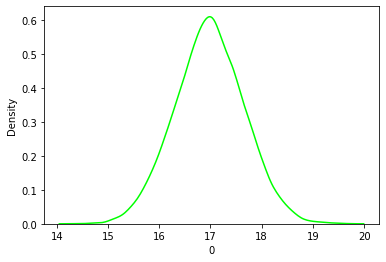

In [39]:
sns.distplot(data_sample_r[0] , color = 'lime' , hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


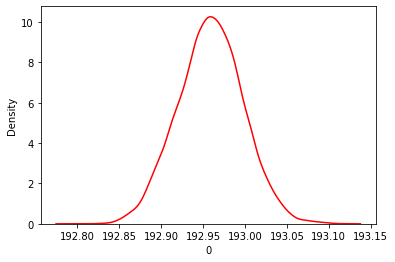

In [40]:
sns.distplot(data_sample_d[0] , color = 'red' , hist=False)

In [ ]:
M_r.to_csv("M_r_phot.csv") 